In [1]:
import numpy as np
import os
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

os.chdir('E:\DIAT_SEM_1_DNN_ASS\Traffic')
# Step 1: Load the Data from .npy Files
data = np.load('./Dataset/data.npy')
labels = np.load('./Dataset/target.npy')



In [2]:
# Step 2: Preprocess the Data
# Normalize the data to [0, 1]
data = data.astype('float32') / 255.0

In [3]:
from keras.utils import to_categorical
# Convert labels to categorical if needed
num_classes = len(np.unique(labels))  # Determine number of classes
labels = to_categorical(labels, num_classes)

In [4]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42,shuffle=True)

In [5]:
# Step 3: Create the CNN Model
def create_cnn(num_classes):
    input_shape = Input(shape=(64, 64, 3))
    x = Conv2D(32, (3, 3), activation='relu', padding='valid')(input_shape)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Conv2D(64, (3, 3), activation='relu', padding='valid')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Conv2D(128, (3, 3), activation='relu', padding='valid')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)  # Output layer

    model = Model(inputs=input_shape, outputs=output)
    return model


In [6]:
# Step 4: Compile the Model
cnn_model = create_cnn(num_classes)
cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856 

In [7]:

# Step 5: Train the Model
history = cnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)


Epoch 1/10
491/491 [==============================] - 25s 27ms/step - loss: 0.9670 - accuracy: 0.7347 - val_loss: 0.1788 - val_accuracy: 0.9527
Epoch 2/10
491/491 [==============================] - 8s 17ms/step - loss: 0.1016 - accuracy: 0.9738 - val_loss: 0.0881 - val_accuracy: 0.9810
Epoch 3/10
491/491 [==============================] - 8s 16ms/step - loss: 0.0490 - accuracy: 0.9865 - val_loss: 0.0572 - val_accuracy: 0.9869
Epoch 4/10
491/491 [==============================] - 7s 14ms/step - loss: 0.0318 - accuracy: 0.9912 - val_loss: 0.1284 - val_accuracy: 0.9695
Epoch 5/10
491/491 [==============================] - 7s 15ms/step - loss: 0.0272 - accuracy: 0.9922 - val_loss: 0.0581 - val_accuracy: 0.9858
Epoch 6/10
491/491 [==============================] - 8s 17ms/step - loss: 0.0253 - accuracy: 0.9933 - val_loss: 0.0513 - val_accuracy: 0.9895
Epoch 7/10
491/491 [==============================] - 7s 15ms/step - loss: 0.0139 - accuracy: 0.9959 - val_loss: 0.0591 - val_accuracy: 0.987

In [ ]:
import gc
gc.collect()

In [9]:
# Step 6: Evaluate the Model
test_loss, test_accuracy = cnn_model.evaluate(X_val, y_val)
print(f'Test accuracy: {test_accuracy:.4f}')

246/246 [==============================] - 1s 4ms/step - loss: 0.0622 - accuracy: 0.9890
Test accuracy: 0.9890


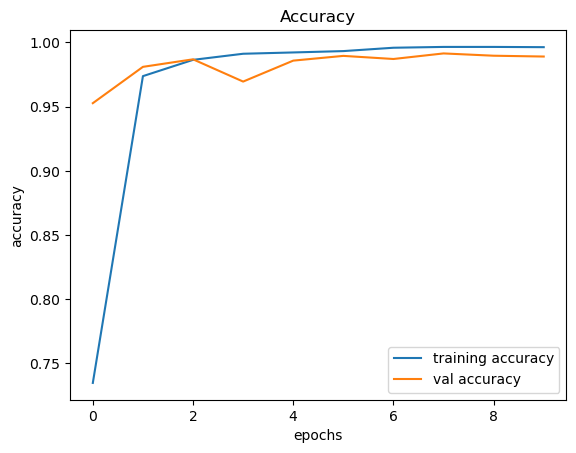

In [10]:
import matplotlib.pyplot as plt
# accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

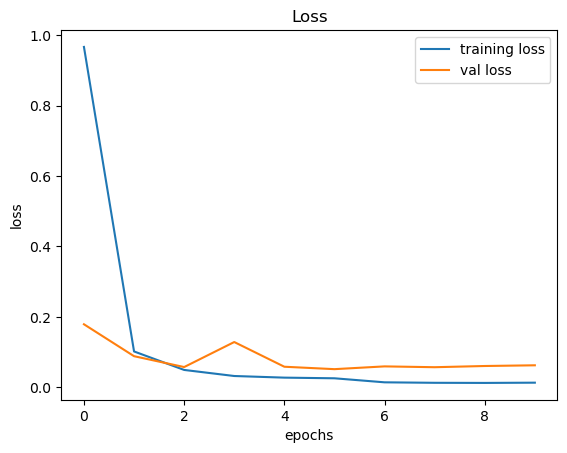

In [11]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [13]:
cnn_model.save("./Chandresh.h5")